Implementation of Kernigahn-Lin hill-climbing approximation to the minimum graph cut problem. Copilot prompt 

_can you show me python code for implementing Kernigahn and Lin's hill-climbing solution to finding balanced partitions with minimum edges cut_

In [16]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import networkx as nx
import numpy as np
from numpy.typing import NDArray
from typing import Hashable, Tuple, Set, List

def get_NCM_Figure3_14() -> Tuple[nx.Graph, dict[Hashable, Tuple[float, float]]]:
    """
        Figure 3.14 from the book Networks, Crowds, and Markets is a useful
        example graph. This function returns this figure as a networkx Graph
        and a position dictionary for the neato layout
    """
    G: nx.Graph = nx.Graph()
    G.add_nodes_from(range(0,14))
    G.add_edges_from([(0,1),(0,2),(1,2),(3,4),(3,5),(4,5),(8,9),(8,10),(9,10),(11,12),(11,13),(12,13),(2,6),(5,6),(7,8),(7,11),(6,7)])
    pos: dict[Hashable, Tuple[float, float]] = nx.nx_pydot.graphviz_layout(G,prog='neato')
    return G, pos

def draw_edge_by_type(G: nx.Graph, 
                      pos: dict[Hashable, Tuple[float, float]], 
                      edge: Tuple[Hashable, Hashable], 
                      partition: Tuple[Set, ...]
                      ) -> None:
    """
        Draw edges between nodes in different partitions using dashed lines.
        Draw edges between nodes within the same partition using solid lines.
    """
    edge_style = 'dashed'
    for part in partition:
        if edge[0] in part and edge[1] in part:
            edge_style = 'solid'
            break
    nx.draw_networkx_edges(G, pos, edgelist=[edge], style = edge_style)

def show_partitions(G: nx.Graph,
                    partition: Tuple[Set, ...], 
                    pos: dict[Hashable, Tuple[float, float]] | None = None,
                    title = ""
                    ) -> None:
    """ 
        Show the networkx graph with colors and edges indicating properties
        of the partition

        Edges:
        • Dashed lines indicate edges between nodes in different partitions
        • Solid lines indicate edges between nodes in the same partition

        Nodes:
        • All nodes in the same partition get mapped to the same color
        • When there are more partitions than ther are in the color pallette, repeat colors
    """
    #color_list = ['c','m','y','g','r']
    color_list: list[str] = ['y', 'lightblue', 'violet', 'salmon', 
                         'aquamarine', 'lightpink', 'lightgray', 'linen']
    plt.clf()
    ax: Axes = plt.gca()
    if pos is None: 
        pos = nx.spring_layout(G, seed = 0)
    for i in range(len(partition)):
        nx.draw_networkx_nodes(partition[i],pos,node_color=color_list[i%len(color_list)], alpha = 0.8)
    for edge in G.edges:
        draw_edge_by_type(G, pos, edge, partition)
    nx.draw_networkx_labels(G,pos)
    if len(G.edges) == 0:
        mod = 0
    else:
        mod = nx.algorithms.community.quality.modularity(G,partition)
    title = title + " Modularity = " + str(np.round(mod,2))

    ax.set_title(title)
    ax.set_axis_off()

In [17]:
import networkx as nx
import random

def kernighan_lin_bisection(G, max_iter=10):
    # Initialize partitions
    nodes = list(G.nodes())
    random.shuffle(nodes)
    mid = len(nodes) // 2
    A = set(nodes[:mid])
    B = set(nodes[mid:])
    
    def calculate_cost(A, B):
        cut_size = 0
        for u in A:
            for v in G.neighbors(u):
                if v in B:
                    cut_size += 1
        return cut_size
    
    def gain(u, A, B):
        internal = sum(1 for v in G.neighbors(u) if v in A)
        external = sum(1 for v in G.neighbors(u) if v in B)
        return external - internal
    
    for _ in range(max_iter):
        gains = []
        for u in A:
            for v in B:
                gain_u = gain(u, A, B)
                gain_v = gain(v, B, A)
                gains.append((gain_u + gain_v, u, v))
        
        gains.sort(reverse=True)
        
        best_gain = 0
        best_pair = None
        current_gain = 0
        for gain_value, u, v in gains:
            current_gain += gain_value
            if current_gain > best_gain:
                best_gain = current_gain
                best_pair = (u, v)
        
        if best_pair:
            u, v = best_pair
            A.remove(u)
            B.add(u)
            B.remove(v)
            A.add(v)
        else:
            break
    
    return A, B, calculate_cost(A, B)

Partition A: {6, 8, 9, 10, 11, 12, 13, 14, 17, 19, 20, 22, 23, 24, 25, 27, 30}
Partition B: {1, 2, 3, 0, 5, 4, 7, 15, 16, 18, 21, 26, 28, 29, 31, 32, 33}
Cut size: 42


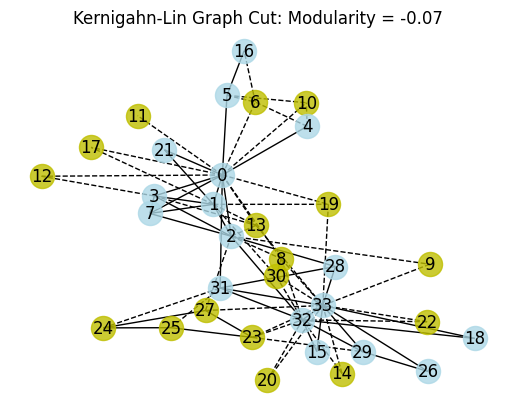

In [18]:
# Example usage
G = nx.karate_club_graph()
A, B, cut_size = kernighan_lin_bisection(G)
print("Partition A:", A)
print("Partition B:", B)
print("Cut size:", cut_size)
show_partitions(G, partition=[set(A), set(B)], title="Kernigahn-Lin Graph Cut:")

Partition A: {4, 5, 8, 9, 10, 12, 13}
Partition B: {1, 0, 2, 3, 7, 6, 11}
Cut size: 6


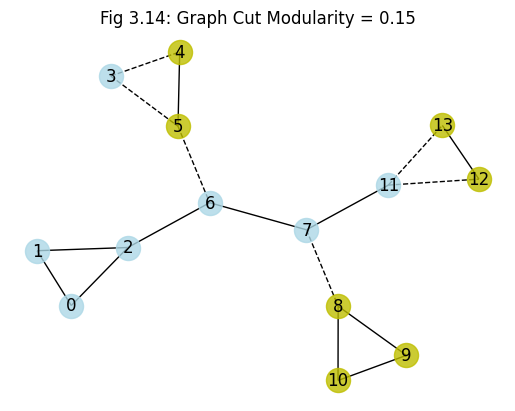

In [21]:
# Example usage
G, pos = get_NCM_Figure3_14()
A, B, cut_size = kernighan_lin_bisection(G)
print("Partition A:", A)
print("Partition B:", B)
print("Cut size:", cut_size)
show_partitions(G, 
                partition=[set(A), set(B)], title="Fig 3.14: Graph Cut",
                pos=pos)

Student activities
- run each multiple times
- talk about why low modularity and refresh on problem being solved
- make predictions of what will happen for various initial split